<a href="https://colab.research.google.com/github/MrGuidry/CS4650/blob/Homework5/CS4650_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy
!pip install newsapi-python
!python -m spacy download en_core_web_lg

In [93]:
import en_core_web_lg
from newsapi import NewsApiClient

nlp_eng = en_core_web_lg.load()
newsapi = NewsApiClient (api_key='4589cfd31f814a91bf1f106e79094f92')

In [103]:
#List of each page we are getting (5 pages each with 20 articles)
articles = []

for x in range(1, 6):
  articles.append(newsapi.get_everything(q='coronavirus', language='en', from_param='2021-02-22', to='2021-03-21', sort_by='relevancy', page=x))

In [104]:
import pickle

filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))

filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))

filepath = '/content/articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

In [133]:
import pandas as pd
dados = []
for i, article in enumerate(articles):
    for x in article['articles']:
        title = x['title']
        date = x['publishedAt']
        description = x['description']
        content = x['content']
        dados.append({'title':title, 'date':date, 'desc':description, 'content':content})
df = pd.DataFrame(dados)
df = df.dropna()
df.head(100)

,title,date,desc,content
0,Coronavirus Briefing: What Happened Today,2021-03-12T23:12:19Z,An optimistic view of the weeks ahead.,What do you think the next few months look lik...
1,"Your N.B.A. Coronavirus Questions, Answered",2021-03-11T22:49:26Z,Can fans attend all games? Will players be vac...,Why havent I seen Wayne Knight in the ads for ...
2,Coronavirus Briefing: What Happened Today,2021-03-09T23:04:24Z,People with underlying conditions are begging ...,But medical ethicists say the list is misleadi...
3,Coronavirus Briefing: What Happened Today,2021-03-16T22:21:05Z,The U.S. political divide is affecting its vac...,Similar laborious efforts may have to be scale...
4,Coronavirus Briefing: What Happened Today,2021-03-11T23:32:45Z,"Israel’s reopening, and vaccine doses in limbo.","How is the Green Passport system working, for ..."
...,...,...,...,...
95,Big Shipments to Africa Ramp Up Global Vaccine...,2021-02-24T10:29:05Z,The initiative known as Covax plans to deliver...,"LiveUpdated Feb. 24, 2021, 5:29 a.m. ET\r\nFeb..."
96,Biden’s Speech Will Kick Off Stimulus Promotio...,2021-03-11T16:19:48Z,President Biden is set to deliver an address j...,"LiveUpdated March 11, 2021, 11:22 a.m. ET\r\nM..."
97,"Sergio García, Leading the Players Championshi...",2021-03-12T02:04:26Z,García tested positive for the coronavirus jus...,García began Thursdays round on the back nine ...
98,"Confident of Supply, More U.S. States Expand A...",2021-03-11T10:41:23Z,The coronavirus was declared a pandemic exactl...,"LiveUpdated March 11, 2021, 5:40 a.m. ET\r\nMa..."


In [134]:
def get_keywords_eng(content):
  result = []
  cont = nlp_eng(content)
  nlp_eng.Defaults.stop_words
  pos_tag = ["VERB","NOUN","PROPN"]
  for token in cont:
    if (token.text in nlp_eng.Defaults.stop_words or token.pos_ is "PUNCT"):
      continue
    if (token.pos_ in pos_tag):
      result.append(token.text)
  return result

In [139]:
from collections import Counter

results = []
for content in df.content.values:
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])

df['keywords'] = results
df.to_excel("output.xlsx")
df.head(100)

,title,date,desc,content,keywords
0,Coronavirus Briefing: What Happened Today,2021-03-12T23:12:19Z,An optimistic view of the weeks ahead.,What do you think the next few months look lik...,"[#going, #think, #months, #look, #U.S.]"
1,"Your N.B.A. Coronavirus Questions, Answered",2021-03-11T22:49:26Z,Can fans attend all games? Will players be vac...,Why havent I seen Wayne Knight in the ads for ...,"[#Knight, #seen, #Wayne, #ads, #Space]"
2,Coronavirus Briefing: What Happened Today,2021-03-09T23:04:24Z,People with underlying conditions are begging ...,But medical ethicists say the list is misleadi...,"[#ethicists, #list, #suggests, #risks, #condit..."
3,Coronavirus Briefing: What Happened Today,2021-03-16T22:21:05Z,The U.S. political divide is affecting its vac...,Similar laborious efforts may have to be scale...,"[#efforts, #scaled, #country, #strives, #herd]"
4,Coronavirus Briefing: What Happened Today,2021-03-11T23:32:45Z,"Israel’s reopening, and vaccine doses in limbo.","How is the Green Passport system working, for ...","[#Green, #Passport, #system, #working, #example]"
...,...,...,...,...,...
95,Big Shipments to Africa Ramp Up Global Vaccine...,2021-02-24T10:29:05Z,The initiative known as Covax plans to deliver...,"LiveUpdated Feb. 24, 2021, 5:29 a.m. ET\r\nFeb...","[#Feb., #a.m., #ET, #LiveUpdated, #initiative]"
96,Biden’s Speech Will Kick Off Stimulus Promotio...,2021-03-11T16:19:48Z,President Biden is set to deliver an address j...,"LiveUpdated March 11, 2021, 11:22 a.m. ET\r\nM...","[#March, #a.m., #ET, #LiveUpdated, #President]"
97,"Sergio García, Leading the Players Championshi...",2021-03-12T02:04:26Z,García tested positive for the coronavirus jus...,García began Thursdays round on the back nine ...,"[#hole, #García, #began, #Thursdays, #round]"
98,"Confident of Supply, More U.S. States Expand A...",2021-03-11T10:41:23Z,The coronavirus was declared a pandemic exactl...,"LiveUpdated March 11, 2021, 5:40 a.m. ET\r\nMa...","[#March, #a.m., #ET, #LiveUpdated, #coronavirus]"


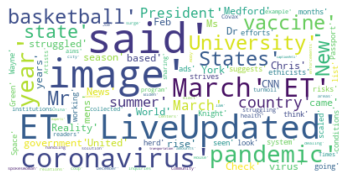

In [136]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('WordCloud.png', dpi=100)
plt.show()